In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random

In [9]:
class LandGeneration():
    '''
    LandGeneration Class creates Land Object by plotting cells of different colors, representing vegetations:
        1. Residential Areas are in White Squares [Value 5]
        2. Agricultural Lands are in Light Green Squares [Value 15]
        3. Forest Type 1 Areas are given in Green Squares [Value 25]
        4. Forest Type 2 Areas are given in Dark Olive Green [Value 35]
        5. Forest Type 3 Areas are given in Forest Green [Value 45]
    '''
    
    def __init__(self, LandSize):
        '''
        Instantiate attributes: LandSize is a list [row, col]
        '''
        self.ROW = LandSize[0]
        self.COL = LandSize[1]
        self.DATA = []
        self.GRID = []
        self.count_res = 0
        self.count_ag = 0
        self.count_ft1 = 0
        self.count_ft2 = 1
        
    def ResArea(self):
        '''
        Residential Area Size Determination. Randomly sized every time code is run
        Returns ranges of row and column
        
        '''
        row = self.ROW
        col = self.COL        
        # DEFINE THE SIZE OF THE RESIDENTIAL AREA FROM CENTER
        rand_per = random.randint(3,10)
        interval_row = int(row * rand_per/100)
        interval_col = int(col * rand_per/100)
        # RESIDENTIAL AREA
        if self.count_res % 2 == 0:
            rand1 = random.randint(10,30)
        else:
            rand1 = random.randint(70,90)
        row_res1 = int(row * rand1/100) # POSITION OF THE ROW CENTER
        col_res1 = int(col * (1-rand1/100)) # POSITION OF THE COLUMN CENTER
        city1_row= range(row_res1 - interval_row,row_res1 + interval_row) 
        city1_col = range(col_res1 - interval_col, col_res1 + interval_col)
        li = [city1_row, city1_col]
        self.count_res += 1
        return li
    
    def AgLand(self):
        '''
        Agricultural Land Size Determination. Randomnly sized every time code is run
        Returns ranges of row and column
        '''
        row = self.ROW
        col = self.COL
        rand_per2 = random.randint(5,15)
        interval_row2 = int(row * rand_per2/100)
        interval_col2 = int(col * rand_per2/100)
        if self.count_ag % 2 == 0:
            rand3 = random.randint(30,45)
        else:
            rand3 = random.randint(45,60)
        row_res3 = int(row * rand3/100) 
        col_res3 = int(col * (1-rand3/100))
        ag1_row= range(row_res3 - interval_row2,row_res3 + interval_row2)
        ag1_col = range(col_res3 - interval_col2, col_res3 + interval_col2)
        li = [ag1_row, ag1_col]
        self.count_ag += 1
        return li
    
    def ForestLand(self):
        '''
        Forest Areas Land Size Determination. Randomly sized and returns range of row and column
        '''
        row = self.ROW
        col = self.COL
        rand_per3 = random.randint(15,40)
        interval_row3 = int(row * rand_per3/100)
        interval_col3 = int(col * rand_per3/100)
        if self.count_ft1 % 2 == 0:
            rand4 = random.randint(5,45)
            row_res4 = int(row * rand4/100) 
            col_res4 = int(col * (1-rand4/100))
        else:
            rand4 = random.randint(65,95)
            row_res4 = int(row * rand4/100) 
            col_res4 = int(col * (1-rand4/100))
        
        ft1_row= range(row_res4 - interval_row3,row_res4 + interval_row3)
        ft1_col = range(col_res4 - interval_col3, col_res4 + interval_col3)
        li = [ft1_row, ft1_col]
        self.count_ft1 += 1
        return li
    
    
    def CreateLand(self, LI, typ):     
        '''
        Taking the sizes of each of the areas specified in the above functions,
        this function maps their sizes to the map. It returns a list of values in
        an array. However, it can only do one area at a time, so the next funcntion 
        CombineLand, combines all these map arrays
        
        '''
        self.DATA = []  # CLEAR THE DATA LIST SO THAT IT DOES NOT KEEP APPENDING TO ITSELF
        print("Size of " + str(typ) + ": " +  str(LI))
        Col = LI[0]
        Row = LI[1]
        
        data = self.DATA
        my_list = [45] * 100
        for r in range(self.ROW):
            row_ = []
            for c in range(self.COL):        
                if c in Col and r in Row and typ == "res":
                    row_.append(5)
                elif c in Col and r in Row and typ == "ag":
                    row_.append(15)
                elif c in Col and r in Row and typ == "1":
                    row_.append(25)
                elif c in Col and r in Row and typ == "2":
                    row_.append(35)
                else:
                    d = random.choice(my_list)
                    row_.append(d)
            data.append(row_)
        return data    
        
    def CombineLands(self, DAT):
        '''
        Combines all the maps into one array, which will be used to plot a map
        Returns this array to the graphing function
        '''
        self.GRID = []
        t = 0
        for r in range(self.ROW):
            row_ = []
            for c in range(self.COL):
                temp = []
                for t in range(len(DAT)):
                    temp.append(DAT[t][r][c])
                min_ = min(temp)
                #min_ = min(DAT[t][r][c],DAT[t+1][r][c],DAT[t+2][r][c])
                row_.append(min_)
            self.GRID.append(row_)    
        return self.GRID
    
    def GraphLand(self, data):
        '''
        Graphs all the land maps in one figure
        0-9: White for Residential Areas
        10-19: Lawngreen for Agriculture Lands
        20-29: Green for Forest Area 1
        30-39: Olive Green for Forest Area 2
        40-49: Forest Green for Forest Area 3
        50-59: Gray for newly ignited fire
        60-159: Red for Actual Fire
        160-169: Black for destroyed land
        '''
        cmap = colors.ListedColormap(['white','lawngreen','green','#556B2F','#228B22', '#C0C0C0', '#B22222', '#000000'])
        bounds = [0,10,20,30,40,50,60,160,170]
        # ([0,20,30],2) = [0,20] is one color and [20,30] is another color?
        norm = colors.BoundaryNorm(bounds,cmap.N)
        fig, ax = plt.subplots()
        ax.imshow(data,cmap=cmap,norm=norm)
        #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        ax.set_xticks(np.arange(-.5, len(data[1]), 1), " ")
        #ax.get_xaxis().set_visible(False)
        ax.set_yticks(np.arange(-.5, len(data), 1)," ")
        #ax.get_yaxis().set_visible(False)
        return fig, ax 
    
    def UpdateFire_All (self, x, y, data, init_data, temp, humid, wind, vehicle):
        '''
        Takes previous data, initial data, weather, and firefighting vehicle inputs
        Employs UpdateFire function - see next - to update the neighboring cells if current cell is on fire 
        Returns new data 
        '''
        (data, init_data) = (data, init_data)
        (temp, humid, wind) = (temp, humid, wind)
        vehicle = vehicle
        
        if data[y][x] in range (60, 159):
            data[y][x-1] = self.UpdateFire(data[y][x-1], init_data[y][x-1], temp, humid, wind, vehicle) 
            data[y][x+1] = self.UpdateFire(data[y][x+1], init_data[y][x+1], temp, humid, wind, vehicle) 
            data[y-1][x] = self.UpdateFire(data[y-1][x], init_data[y-1][x], temp, humid, wind, vehicle)
            data[y+1][x] = self.UpdateFire(data[y+1][x], init_data[y+1][x], temp, humid, wind, vehicle)
            data[y+1][x-1] = self.UpdateFire(data[y+1][x-1], init_data[y+1][x-1], temp, humid, wind, vehicle)
            data[y+1][x+1] = self.UpdateFire(data[y+1][x+1], init_data[y+1][x+1], temp, humid, wind, vehicle)
            data[y-1][x-1] = self.UpdateFire(data[y-1][x-1], init_data[y-1][x-1], temp, humid, wind, vehicle)
            data[y-1][x+1] = self.UpdateFire(data[y-1][x+1], init_data[y-1][x+1], temp, humid, wind, vehicle)
        return data
        
    
    def UpdateFire(self, cell, init_landID, temp, humid, wind, vehicle):
        '''
        Updates ID in one cell due to effects of initial land type, weather, firefighting vehicle 
        '''
        # Fire spread rate: Forest Area 3 > Forest Area 2 > Forest Area 1  
        update_rateres = 0.2
        update_rateagr = 0.3
        update_rate1 = 1
        update_rate2 = 2
        update_rate3 = 3
        
        
        # Effects of weather of fire spread 
        (temp, humid, wind) = (temp, humid, wind)
        if temp >= 30: 
            temp_add = temp*0.05
            
        if humid >= 70: 
            humid_add = -humid*0.01
        elif humid < 30: 
            humid_add = humid*0.05
        else: 
            humid_add = 0
            
        wind_add = wind*0.05
        
        # Effect of firefighting vehicle 
        vehicle = -vehicle*0.05 
        
        if init_landID in range (0, 9):        # Agriculture Area
            cell = max(cell, 50) + update_rateres + temp_add + humid_add + wind_add + vehicle
        elif init_landID in range (10, 19):    # Residential Area 
            cell = max(cell, 50) + update_rateagr + temp_add + humid_add + wind_add + vehicle
        elif init_landID in range (20, 29):    # Forest Area 1
            cell = max(cell, 50) + update_rate1 + temp_add + humid_add + wind_add + vehicle 
        elif init_landID in range (30, 39):    # Forest Area 2
            cell = max(cell, 50) + update_rate2 + temp_add + humid_add + wind_add + vehicle
        elif init_landID in range (40, 49):    # Forest Area 3 
            cell = max(cell, 50) + update_rate3 + temp_add + humid_add + wind_add + vehicle
            
        # CAN ADD SMOKE AND HEAT AS A FUNCTION OF CELL HERE AND RETURN THEIR VALUES 
        return cell 
    
    def FireMeasure(self, data): 
        fire_cells = []
        unit_cost = 500
        
        for y in range (self.ROW):
            for x in range (self.COL): 
                if data[y][x] > 50 and data[y][x] < 159:   # If a cell is on fire (new and old), add it to the list
                    fire_cells.append(data[y][x])
        fire_size = len(fire_cells)    # Number of cells on fire represents fire size 
        cost = fire_size * unit_cost 
        return fire_size, cost 

In [ ]:
class drone:
    batt_level = 100
    batt_drainrate = 1
    IR_radius = 20
    Visual_radius = 40
    IR_heat_trigger = 20
    Visual_heat_trigger = 60
    safety_factor = 1.02
    fire_location = []
    
    def __init__(self,xcell,ycell,mapsize):
        #define current location
        self.xcell=xcell
        self.ycell=ycell
        #define origin
        self.xorigin=xcell
        self.yorigin=ycell
        self.mapsize=mapsize
        self.maprange=np.arange(0,mapsize)

    
    #drain battery from movement and IR/visual cam usage
    def batt_drain(self):
            self.batt_level=self.batt_level-self.batt_drainrate

    #move to random adjacent cell
    def moverandom(self):
        randlist = [[0,1],[1,1],[1,0],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]] #possible movement, excluding [0,0] so it wont stay in the same grid
        movement_step = random.choice(randlist)
        self.xcell = self.xcell+movement_step[0][0]
        self.ycell = self.ycell+movement_step[0][1]
        
        #if x or y coordinate is not in the map range, random new movement
        while self.xcell not in self.maprange or self.ycell not in self.maprange:
            movement_step = random.choice(randlist)
            self.xcell = self.xcell+movement_step[0][0]
            self.ycell = self.ycell+movement_step[0][1]
        self.batt_drain

        

    #move to specific target
    def movetotarget(self,xtarget,ytarget):
        #check x direction to target
        if self.xcell < xtarget:
            xdir = 1
        elif self.xcell > xtarget:
            xdir = -1
        else:
            xdir = 0
            
        #check y direction to target
        if self.ycell < ytarget:
            ydir = 1
        elif self.ycell > ytarget:
            ydir = -1
        else:
            ydir = 0
        
        #move toward x
        while self.xcell != xtarget:
            self.xcell=self.xcell+xdir
            self.batt_drain
        
        #move toward y
        while self.ycell != ytarget:
            self.ycell=self.ycell+ydir
            self.batt_drain
    
    #check battery level        
    def check_return(self):
        batt_threshold = self.batt_drainrate*(abs(self.xorigin-self.xcell)+abs(self.yorigin-self.ycell))
        if self.batt_level <= batt_threshold*self.safety_factor:
            self.movetotarget(self.xorigin,self.yorigin)            
    
    #read scan heat
    def scan_heat(self,heatmap):
        #read fire status in IR range
        self.IR_range_x=np.arange(self.xcell-self.IR_radius,self.xcell+self.IR_radius)
        self.IR_range_y=np.arange(self.ycell-self.IR_radius,self.ycell+self.IR_radius)
        for x in self.IR_range_x:
            for y in self.IR_range_y:
                if heatmap[x][y] >= self.IR_heat_trigger:
                    print("Fire is detected by IR sensor at the coordinate [" + x + "," + y + "]")
                    np.append(self.fire_location,[x,y],axis = 0)
        #read smoke status in visual range
        self.Visual_range_x=np.arange(self.xcell-self.Visual_radius,self.xcell+self.Visual_radius)
        self.Visual_range_y=np.arange(self.ycell-self.Visual_radius,self.ycell+self.Visual_radius)
        for x in self.Visual_range_x:
            for y in self.Visual_range_y:
                if heatmap[x][y] >= self.Visual_heat_trigger:
                    print("Fire is detected by smoke at the coordinate [" + x + "," + y + "]")        
                    np.append(self.fire_location,[x,y],axis = 0)
        return np.unique(self.fire_location)
        #send alarm


In [ ]:
class FireEngine:
        
    def __init__(self):
        self.typ = 'Type 3 Wildland Engine' 
        self.tankCap = 500 # US GALLONS 
        self.flowRate = 50 # GALLONS PER MINUTE, WITH A MAX VALUE OF 150
        self.operCost = 217 # DOLLARS PER HOUR
        self.color = '#FF4500' # ORANGE RED HEX CODE
        self.FE1 = FS1.findClosestFireStation() # LAT CENTER OF RES AREA
        self.FE2 = FS1.findFarthestFireStation() # LON CENTER OF RES AREA
        
        
    def printVehicleDescription(self):
        print('Vehicle Type: ' + str(self.typ))
        print('Tank Capacity (US Gal): ' + str(self.tankCap))
        print('Flow Rate (US Gal/min): ' + str(self.flowRate))
        print('Operating Cost ($/hr): ' + str(self.operCost))
        print('Vehicle Color: ' + str(self.color))
        #print('Starting Vehicle Location: (' + str(self.) + ', ' + str(self.lat) + ')')
        return None 
    
    def graphFireEngine(self, lon, lat):
        plt.plot(lon, lat,'b,')
        # plt.show()
        return None
        
    def countTime(self, time):
        time += 1 # in minutes
        return time 
        
    def goTo(self, fireLoc):
        row_fire = fireLoc[0]
        col_fire = fireLoc[1]
        X = []
        Y = []
        X2 = []
        Y2 = []
        time1 = 0
        time2 = 0
        while abs(row_fire - self.FE1[0]) > 0 or abs(col_fire - self.FE1[1]) > 0:
            time1 = time1 + 1 # ASSUMING 1 CELL TAKES 1 MINUTE TO TRAVEL
            if row_fire > self.FE1[0]:
                self.FE1[0] += 1  # ROW OF FIRE ENGINE
            elif row_fire < self.FE1[0]:
                self.FE1[0] -= 1
            else:
                if col_fire > self.FE1[1]:
                    self.FE1[1] += 1
                elif col_fire < self.FE1[1]:
                    self.FE1[1] -= 1
                else:
                    tmp = None
            X.append(self.FE1[1])
            Y.append(self.FE1[0])
            if time1 % 6 == 0: # This is just to control the number of samples
                if (row_fire - self.FE1[0]) > 0:
                    plt.plot(self.FE1[1],self.FE1[0],color='blue',marker=r'$\downarrow$',markersize=10)
                elif (row_fire - self.FE1[0]) < 0:
                    plt.plot(self.FE1[1],self.FE1[0],color='blue',marker=r'$\uparrow$',markersize=10)
                elif (col_fire - self.FE1[1]) > 0:
                    plt.plot(self.FE1[1],self.FE1[0],color='blue',marker=r'$\rightarrow$',markersize=10)
                else:
                    plt.plot(self.FE1[1],self.FE1[0],color='blue',marker=r'$\leftarrow$',markersize=10)
        
        while abs(row_fire - self.FE2[0]) > 0 or abs(col_fire - self.FE2[1]) > 0:
            time2 = time2 + 1 # ASSUMING 1 CELL TAKES 1 MINUTE TO TRAVEL
            if col_fire > self.FE2[1]:
                self.FE2[1] += 1
            elif col_fire < self.FE2[1]:
                self.FE2[1] -= 1
            else:
                if row_fire > self.FE2[0]:
                    self.FE2[0] += 1  # ROW OF FIRE ENGINE
                elif row_fire < self.FE2[0]:
                    self.FE2[0] -= 1
                else:
                    tmp = None
                  
            
            X2.append(self.FE2[1])
            Y2.append(self.FE2[0])
            if time2 % 6 == 0: # This is just to control the number of samples
                if (col_fire - self.FE2[1]) > 0:
                    plt.plot(self.FE2[1],self.FE2[0],color='pink',marker=r'$\rightarrow$',markersize=10)
                elif (col_fire - self.FE2[1]) < 0:
                    plt.plot(self.FE2[1],self.FE2[0],color='pink',marker=r'$\leftarrow$',markersize=10)           
                elif (row_fire - self.FE2[0]) > 0:
                    plt.plot(self.FE2[1],self.FE2[0],color='pink',marker=r'$\downarrow$',markersize=10)
                else:
                    plt.plot(self.FE2[1],self.FE2[0],color='pink',marker=r'$\uparrow$',markersize=10)
                  
        return [time1,time2]

Size of res: [range(5, 25), range(75, 95)]
Size of res: [range(70, 84), range(16, 30)]
Size of ag: [range(30, 48), range(52, 70)]
Size of ag: [range(40, 56), range(44, 60)]
Size of 1: [range(-8, 54), range(46, 108)]
Size of 1: [range(56, 94), range(6, 44)]
Size of 2: [range(-8, 42), range(58, 108)]
Size of 2: [range(39, 95), range(4, 60)]
The size of fire is 1 cells. The cost associated is 500 USD.
The size of fire is 1 cells. The cost associated is 500 USD.
The size of fire is 1 cells. The cost associated is 500 USD.
The size of fire is 9 cells. The cost associated is 4500 USD.
The size of fire is 10 cells. The cost associated is 5000 USD.
The size of fire is 13 cells. The cost associated is 6500 USD.
The size of fire is 16 cells. The cost associated is 8000 USD.
The size of fire is 19 cells. The cost associated is 9500 USD.
The size of fire is 23 cells. The cost associated is 11500 USD.
The size of fire is 29 cells. The cost associated is 14500 USD.
The size of fire is 34 cells. The 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The size of fire is 100 cells. The cost associated is 50000 USD.
The size of fire is 108 cells. The cost associated is 54000 USD.
The size of fire is 119 cells. The cost associated is 59500 USD.
The size of fire is 133 cells. The cost associated is 66500 USD.
The size of fire is 134 cells. The cost associated is 67000 USD.
The size of fire is 146 cells. The cost associated is 73000 USD.
The size of fire is 159 cells. The cost associated is 79500 USD.
The size of fire is 160 cells. The cost associated is 80000 USD.
The size of fire is 164 cells. The cost associated is 82000 USD.
The size of fire is 169 cells. The cost associated is 84500 USD.
The size of fire is 173 cells. The cost associated is 86500 USD.
The size of fire is 185 cells. The cost associated is 92500 USD.
The size of fire is 181 cells. The cost associated is 90500 USD.
The size of fire is 169 cells. The cost associated is 84500 USD.
The size of fire is 184 cells. The cost associated is 92000 USD.
The size of fire is 194 c

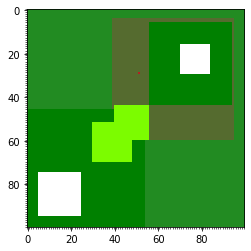

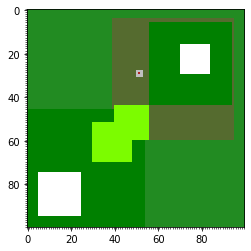

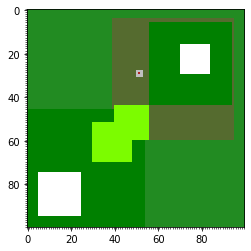

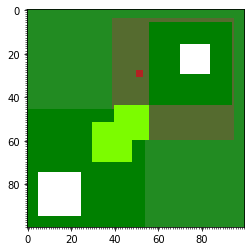

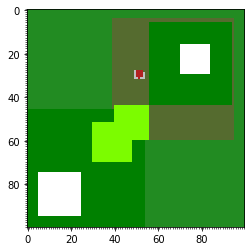

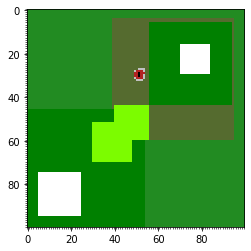

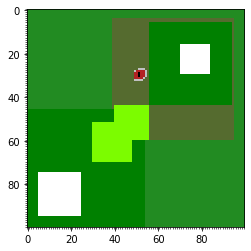

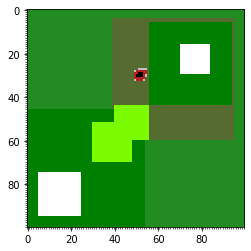

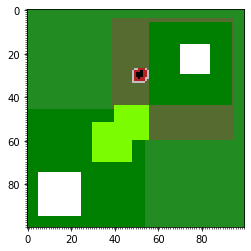

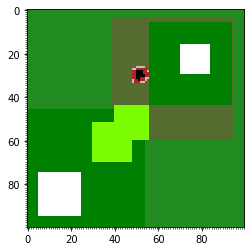

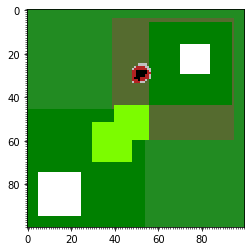

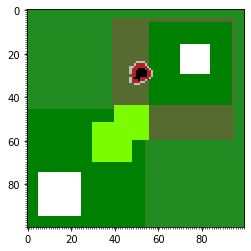

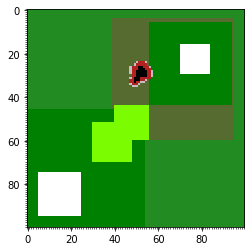

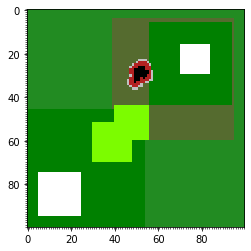

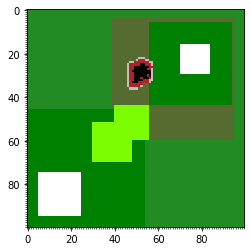

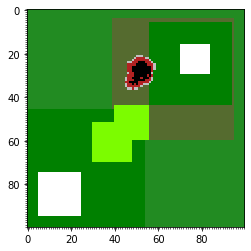

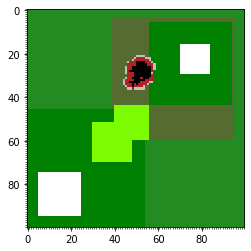

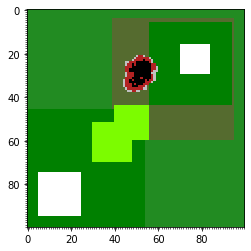

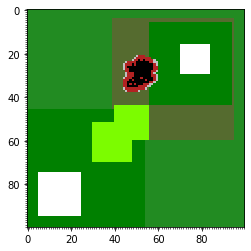

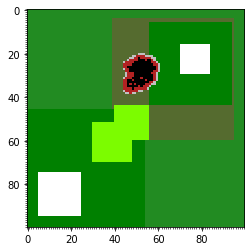

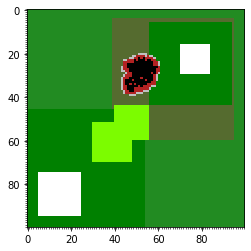

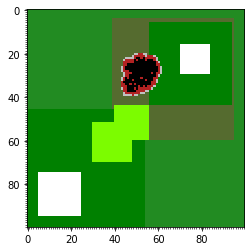

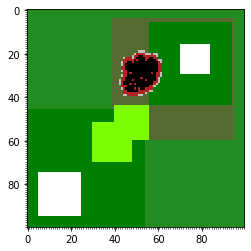

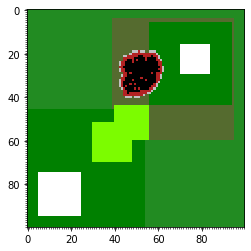

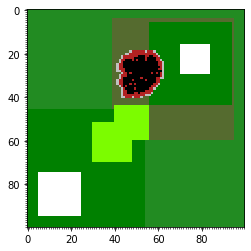

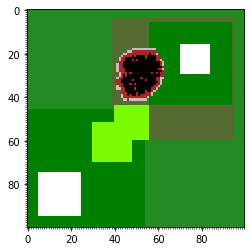

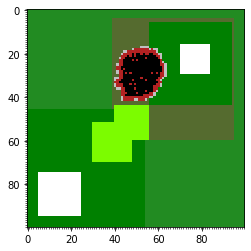

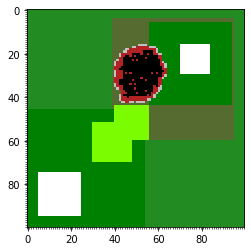

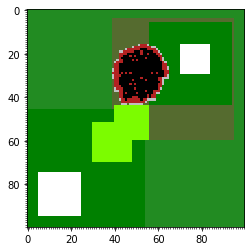

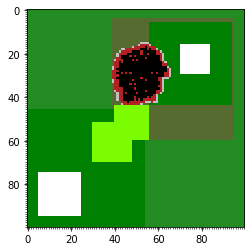

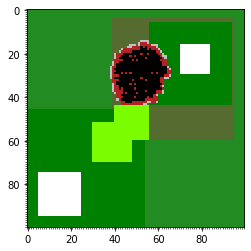

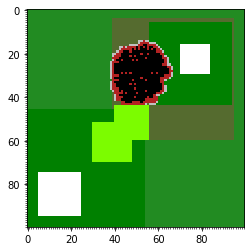

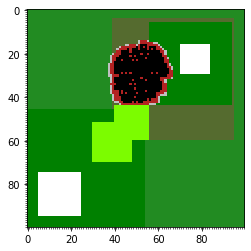

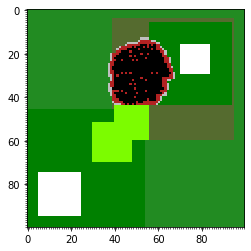

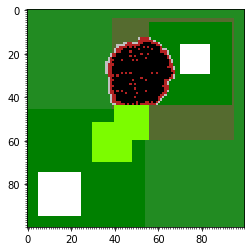

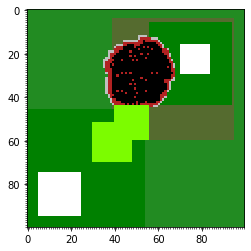

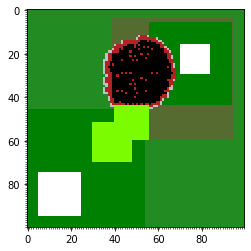

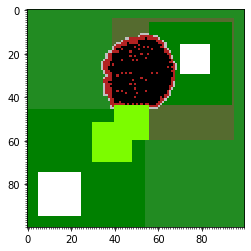

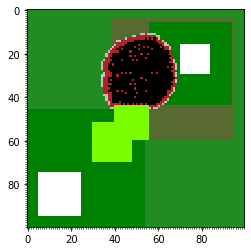

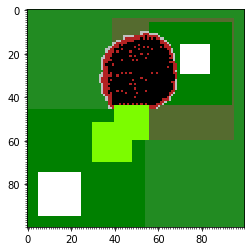

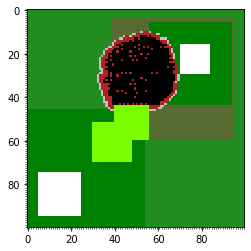

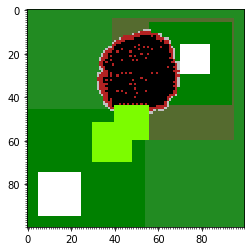

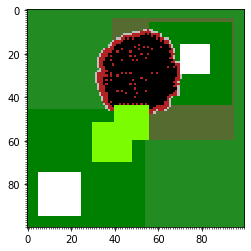

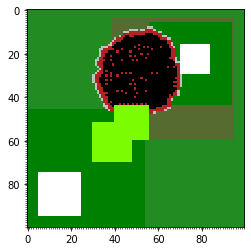

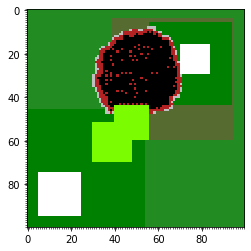

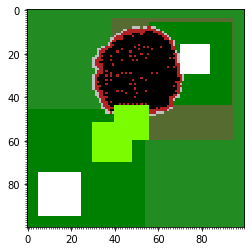

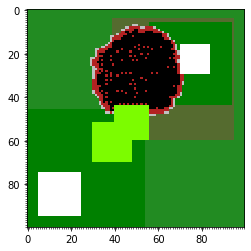

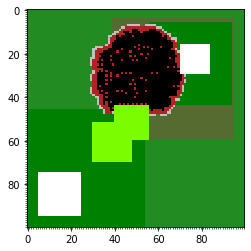

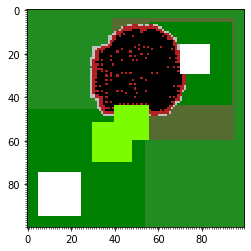

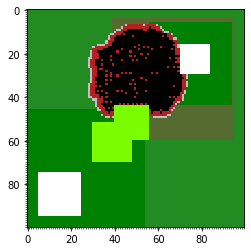

In [10]:
# GENERATE LAND BOUNDARIES        
Land1 = LandGeneration([100,100])
# GENERATE RESIDENTIAL SIZE
Res1 = Land1.ResArea()
Res2 = Land1.ResArea()
# GENERATE AGRICULTURAL SIZE
Ag1 = Land1.AgLand()
Ag2 = Land1.AgLand()
# GENERATE TYPE 1 FOREST SIZE
Ft11 = Land1.ForestLand() 
Ft12 = Land1.ForestLand()
# GENERATE TYPE 2 FOREST SIZE
Ft21 = Land1.ForestLand()
Ft22 = Land1.ForestLand()
# CREATE THE LANDS 
C1 = Land1.CreateLand(Res1,"res")
C2 = Land1.CreateLand(Res2,"res")
C3 = Land1.CreateLand(Ag1,"ag")
C4 = Land1.CreateLand(Ag2,"ag")
C5 = Land1.CreateLand(Ft11, "1")
C6 = Land1.CreateLand(Ft12, "1")
C7 = Land1.CreateLand(Ft21, "2")
C8 = Land1.CreateLand(Ft22, "2")
# COMBINE THE LANDS INTO ONE ARRAY
AA = Land1.CombineLands([C1, C2, C3, C4, C5, C6, C7, C8])       # Land matrix used to update and plot
init_AA = Land1.CombineLands([C1, C2, C3, C4, C5, C6, C7, C8])  # Land matrix unchanged, used for reference 

# CREATE FIRE STATIONS 
'''
Create markers for fire stations using locations Station 1 (x1, y1), Station 2 (x2, y2); 
For example
'''
x1 = 20
y1 = 30
x2 = 50
y2 = 80

'''
This part loops through each time step from 0 to (time-1)
t = 0: fire starts, drones and fire engines are at fire stations 
t > 0: fire propagates, 
       drones start surveiling and send signal when sensing fire, 
       engines on stand-by and move when receiving fire signal from drones 
'''

time = 50
drone_list = []
eng_list = []
vehicle = 0 

for t in range (0, time):
    temp = 40   # [Celsius degree]
    humid = 50  # [percent]
    wind = 20   # [m/s]
    
  
    '''INITIALIZE FIRE, DRONES, FIRE ENGINES'''
    if t == 0: 
    
    # Start fire 
        rfr = random.randint(0,Land1.ROW-1)
        rfc = random.randint(0,Land1.COL-1)
        if AA[rfr][rfc] > 20 and AA[rfr][rfc] < 50: # Only ignite on forest
            AA[rfr][rfc] = 65
    
    # Put drones at fire stations
    drone_num = 3 
    for i in range (drone_num):
        # Even-indexed drones go to Station 2, odd-indexed drones go to Station 1
        if i in range (0, drone_num, 2):
            (dr_x, dr_y) = (x2, y2)
        if i in range (1, drone_num, 2): 
            (dr_x, dr_y) = (x1, y1)
    dr = drone(dr_x, dr_y, Land1.COL, Land1.ROW) # Rawin, mapsize is the Land1.ROW-Land1.COL pair
    drone_list.append(dr) 
        
    # Put fire engines at fire stations
    eng_num = 2
    for i in range (eng_num):
        # Even-indexed fire engines go to Station 2, odd-indexed ones go to Station 1
        if i in range (0, eng_num, 2):
            (eng_x, eng_y) = (x2, y2)
            station_loc = (x2,y2)
        if i in range (1, eng_num, 2): 
            (eng_x, eng_y) = (x1, y1)
            station_loc = (x1, y1)
    eng = FireEngine(eng_x, eng_y, [Land1.COL, Land1.ROW], station_loc)
    eng_list.append(eng) 
    
    
    
    
    '''UPDATE FIRE, DRONES, FIRE ENGINES'''
    
    # FIRE 
    '''
    In order to have the fire to propagate radially, 4 directions of looping are needed.
    Otherwise, fire would only propagates towards the one direction chosen.
        e.g. Direction 1 (below) only: fire would spread from the initial fire, 
        towards the corner of increasing row and column indexes
    4 directions of looping are done alternately, i.e. 1-2-3-4-1-2-3-4-... 
    For each direction, UpdateFire_All function is called to update the data.  
    '''
    
    if t in range (1, time, 4):
    # Update fire in direction 1
        for y in range (0,Land1.ROW-1):
            for x in range (0, Land1.COL-1):
                AA = Land1.UpdateFire_All(x, y, AA, init_AA, temp, humid, wind, vehicle) 
                
    elif t in range (2, time, 4): 
    # Update fire in direction 2
        for y in range (Land1.ROW-1, 0, -1):
            for x in range (0, Land1.COL-1):
                AA = Land1.UpdateFire_All(x, y, AA, init_AA, temp, humid, wind, vehicle)
                
    elif t in range (3, time, 4):
    # Update fire in direction 3
        for y in range (Land1.ROW-1, 0, -1):
            for x in range (Land1.COL-1, 0, -1):
                AA = Land1.UpdateFire_All(x, y, AA, init_AA, temp, humid, wind, vehicle)
                
    else: 
    # Update fire in direction 4
        for y in range (0,Land1.ROW-1):
            for x in range (Land1.COL-1, 0, -1):
                AA = Land1.UpdateFire_All(x, y, AA, init_AA, temp, humid, wind, vehicle)
    
    # Size of fire and associated cost 
    size, cost = Land1.FireMeasure(AA)
    print('The size of fire is', size, 'cells. The cost associated is', cost, 'USD.')
    
    
    
    
    # DRONES
    '''
    Drones scan for heat and smoke
    If fire detected, move towards fire and send signal; otherwise, move randomly
    '''
    for i in range (drone_num):
        fire = drone_list[i].scan_heat(AA) # Can replace with heat_AA (matrix of heat associated with AA) or AA itself is ok
        '''
        This function needs to return something to indicate if there's a fire or not (e.g. fire = 1 or 0),
        '''
        
        if fire == 1: # If fire detected: 
            '''
            Need a function that reads the array of cells with fire, calculate distance to each, find the smallest distance,
            and return the corresponding cell as target (xtarget, ytarget). Then: 
            ''' 
            drone_list[i].movetotarget(xtarget, ytarget)
            drone_list[i].check_return()
        else: 
            drone_list[i].moverandom()
            drone_list[i].check_return()
    '''
    Create markers for drones, using their locations
    '''
    
      
    
    # FIRE ENGINES
    '''
    Fire engines receive fire signal (yes/no, target location) from drones
    If there's a fire, move towards fire till arriving at target location; otherwise, on standby at station 
    At fire location, if there's a fire, does firefighting; otherwise, stop (disappear forever) 
    If energy drains, pause for energy to come back
    '''
    
    for i in range (eng_num): 
        energyfull = eng_list[i].energy_check() 
        waterfull = eng_list[i].water_check()   
        
        if energyfull == False: 
        # If there is no energy, stop to gain energy 
            speed = 0 
            eng_list[i].energy_gain()
            vehicle = 0 # To pass into the FireCell, 0 means there is no vehicle 
            
        else: 
        # If there is energy, function. Assume no energy drain while moving. 
            if fire == 0: 
            # If there is no fire, return to station
                (xstation, ystation) = eng_list[i].station_loc
                eng_list[i].goTo(xstation, ystation)
                vehicle = 0 
            elif fire == 1 and (eng_list[i].x != xtarget or eng_list[i].y != ytarget): 
            # If there is a fire and not at the fire, move towards fire 
                eng.list[i].goTo(xtarget, ytarget)
                
                '''This function moves the fire engine towards any target location passed in
                This needs the engine's current location, dist_calc() func, a fixed speed. For example: 
                speed = 5 
                if dist > speed: 
                    speed = speed
                else: 
                    speed = dist 
                
                Say, dist = 23 initially, the engine would move 5-5-5-5-3 to make sure it stops at the right cell 
                '''
                vehicle = 0 
            else: 
            # If there is a fire and the engine arrived, no move + use energy and water
                eng_list[i].energy_drain()
                eng_list[i].water_drain()
                vehicle = 30             
        '''
        Needs a function that return "vehicle" values for some surronding cells of the fire engine,
        to show that there's firefighting action by the engine --> maybe check this in the FireCell section?
        
        Create markers for fire engines, using their locations
        '''
    
    # Plot land 
    fig, ax = Land1.GraphLand(AA)
    plt.plot()
    